# ЛР №1. Анализ данных, Линейная регрессия (Py 2.7)

# Оглавление

## [1. Знакомство с инструментами](#ch1)
### [1.1. Горячие клавиши](#ch1.1) 
### [1.2. Библиотеки](#ch1.2) 
### [1.3. Загрузка данных](#ch1.3) 
### [1.4. Выбор строк и столбцов](#ch1.4) 
### [1.5. Группировка](#ch1.5) 
### [1.6. Замена значений](#ch1.6) 

## [2. Формирование выборки для обучения и проверки](#ch2) 
### [2.1. Первичный анализ](#ch2.1)
### [2.2. Корреляция](#ch2.2)
### [2.3. Выбор целевого значения и признаков для анализа данных](#ch2.3)
### [2.4. Просмотр характеристик выбранных признаков](#ch2.4)


## [3. Построение регрессионных моделей](#ch3)
### [3.1. Линейная регрессия](#ch3.1)
#### [3.1.1. Одномерная модель от признака 'Rooms'](#ch3.1.1)
#### [3.1.2. Одномерная модель от признака 'Landsize'](#ch3.1.2)
#### [3.1.3. Одномерная модель от признака 'YearBuilt'](#ch3.1.3)
#### [3.1.4. Многомерная модель](#ch3.1.4)

- - - - -

<a name="ch1"> </a>

# 1. Знакомство с инструментами

<a name="ch1.1"> </a>

## 1.1. Горячие клавиши

Изменить масштаб страницы: 
* Ctrl + "+ / -"
* Ctrl + "колеcо мышки вверх/вниз"

Строки  Jupyter Notebook:
* "Enter" - редактировать выделенную 
* Shift + "Enter" - выполнить выделенную, выделить следующую
* Alt + "Enter"   - выполнить выделенную, добавить новую ниже
* Ctrl + "Enter" - выполнить выделенную

В режиме редактирования строки:
* Shift + TAB - Вызов встроенной справки
* TAB - автодополнение строки

<a name="ch1.2"> </a>

## 1.2. Библиотеки

Перед началом работы убедитесь, что необходимые для работы пакеты установлены в системе. Для установки отсутствующих используйте команду:
- pip install numpy scipy pandas sklearn seaborn  matplotlib
- pip install pandas pandoc pydot pydot-ng pydotplus
- pip install jupyter jupyter_nbextensions_configurator jupyter_contrib_nbextensions


* pandas - обработка (загрузка, сохранение, анализа) данных 
* seaborn - визуализация данных (на базе matplotlib)
* sklearn - (классификация, регрессия, кластеризация...)
* numpy - обработка многомерных массивов, линейная алгебра, преобразование Фурье, случайные числа
* scipy - пакет для выполнения научных и инженерных расчётов.

In [22]:
### Example.Python2.7

import pandas as pd
import pylab as pl
import seaborn as sns
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(font_scale=1) # размер шрифта

%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a name="ch1.3"> </a>

## 1.3. Загрузка данных

#### Описание входных данных

Данные "Melbourne Housing Snapshot" содержат информацию о продажах недвижимости в г. Мельбурн (Австралия)
- Suburb: окрестности, пригород
- Rooms: кол-во комнат
- Price: цена
- Method:
  - S - property sold; SP - property sold prior;
  - PI - property passed in; PN - sold prior not disclosed;
  - SN - sold not disclosed; NB - no bid;
  - VB - vendor bid; W - withdrawn prior to auction;
  - SA - sold after auction; SS - sold after auction price not disclosed.
  - N/A - price or highest bid not available.
- Type:
  - br - bedroom(s);
  - h - house,cottage,villa, semi,terrace; 
  - u - unit, duplex; 
  - t - townhouse;
  - dev site - development site;
  - o res - other residential.
- SellerG: агент по недвижимости
- Date: дата продажи
- Distance: Расстояние до центрального делового района CBD (central business district)
- Regionname: Район
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : кол-во спален
- Bathroom: кол-во ванных
- Car: кол-во парковочных мест
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Управляющая компания

Для загрузки табличных данных из файла применятся функция __read_csv()__ с указанием параметров (путь, кодировка, разделитель, обработка колонок с заголовками или датой...)

#### Загрузка входных данных

In [69]:
data = pd.read_csv('./airfoilNASA.dat', # путь к файлу, используй автодотолнение
                   sep='\t', # разделитель данных в файле
                   header=None # номер строки с заголовками. header='None', если заголовки отсутствуют
                  )

In [70]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

Вывести первые 4 строки в таблице

In [76]:
data['Angle '].unique()

array([ 0. ,  1.5,  3. ,  4. ,  2. ,  5.3,  7.3,  2.7,  5.4,  7.2,  9.9,
       12.6,  4.2,  8.4, 11.2, 15.4, 19.7,  4.8,  9.5, 12.7, 17.4, 22.2,
        3.3,  6.7,  8.9, 12.3, 15.6])

In [77]:
data['Angle '].astype('float16')

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
5       0.000
6       0.000
7       0.000
8       0.000
9       0.000
10      0.000
11      0.000
12      0.000
13      0.000
14      0.000
15      0.000
16      0.000
17      0.000
18      0.000
19      0.000
20      0.000
21      0.000
22      0.000
23      0.000
24      0.000
25      0.000
26      0.000
27      0.000
28      0.000
29      0.000
        ...  
1473   15.602
1474   15.602
1475   15.602
1476   15.602
1477   15.602
1478   15.602
1479   15.602
1480   15.602
1481   15.602
1482   15.602
1483   15.602
1484   15.602
1485   15.602
1486   15.602
1487   15.602
1488   15.602
1489   15.602
1490   15.602
1491   15.602
1492   15.602
1493   15.602
1494   15.602
1495   15.602
1496   15.602
1497   15.602
1498   15.602
1499   15.602
1500   15.602
1501   15.602
1502   15.602
Name: Angle , Length: 1503, dtype: float16

In [60]:
data.head(4)

,Frequency,Angle,Chord,Free-stream velocity,Suction thickness,Sound pressure
0,800,0.000,0.305,71.300,0.003,126.201
1,1000,0.000,0.305,71.300,0.003,125.201
2,1250,0.000,0.305,71.300,0.003,125.951
3,1600,0.000,0.305,71.300,0.003,127.591


In [10]:
type(data)

pandas.core.frame.DataFrame

Переменная "data" является экземпляром класса "DataFrame" - основной структуры данных в  библиотеке "pandas".
"DataFrame" - двумерный массив с изменяемым размером. Каждый столбец является экземпляром класса "Series".
"Series"- одномерный индексированный массив определенного типа.
Строки соответствуют объектам.
Столбецы - соответствуют признакам объектов.

__DataFrame__

| Series | Series | Series | Series |
|--------|--------|--------|--------|
| int | string | float | bool |
| int | string | float | bool |
| int | string | float | bool |

In [53]:
data [:5]

,Frequency,Angle,Chord,Free-stream velocity,Suction thickness,Sound pressure
0,800,0.000,0.305,71.300,0.003,126.201
1,1000,0.000,0.305,71.300,0.003,125.201
2,1250,0.000,0.305,71.300,0.003,125.951
3,1600,0.000,0.305,71.300,0.003,127.591
4,2000,0.000,0.305,71.300,0.003,127.461


<a name="ch1.4"> </a>

## 1.4. Выбор строк и столбцов

Получим список всех столбцов

In [88]:
data.columns

Index([u'Freq', u'Angle', u'Chord', u'Fsv', u'Soplo', u'Snd'], dtype='object')

В случае, если названия столбцов отсутствуют, либо требуется их изменить, то полю data.columns следует присвоить новый список(list) из строк.

In [87]:
data.columns = ([u'Freq', u'Angle', u'Chord', u'Fsv', u'Soplo', u'Snd'])

Объект DataFrame  допускает частичный выбор строк и колонок.

In [81]:
# data['столбец'][строка]
data['Freq'][2]

1250

In [44]:
# data.Имя_столбца [начальный инд. строки : конечный инд. строки] 

data.Sound [:5]

0   126.201
1   125.201
2   125.951
3   127.591
4   127.461
Name: Sound, dtype: float64

In [82]:
# Выберем для строк с 10 по 15 значения столбцов с именами 'Price', 'Rooms', 'Address'
# data[ инд./'название' столбца1, ...][начальный инд. строки : конечный инд. строки] 

data[ ['Angle'] ][10:20]

,Angle
10,0.000
11,0.000
12,0.000
13,0.000
14,0.000
15,0.000
16,0.000
17,0.000
18,0.000
19,0.000


Для получения отдельного столбца (тип данных "Series") необходимо запросить единственный столбец по его имени или индексу

In [32]:
print  "{:27} is {}".format( "data[ \'Rooms\' ]", type(data[['Rooms']]) ) 
print  "{:27} is {}".format( "data[ [\'Rooms\'] ]", type(data['Rooms']) ) 
print  "{:27} is {}".format( "data[ [\'Rooms\', \'Rooms\'] ]", type(data[['Rooms','Rooms']]) )

data[ 'Rooms' ]             is <class 'pandas.core.frame.DataFrame'>
data[ ['Rooms'] ]           is <class 'pandas.core.series.Series'>
data[ ['Rooms', 'Rooms'] ]  is <class 'pandas.core.frame.DataFrame'>


Для построения простейшего графика достаточно добавить к конструкции  выше команду __.plot()__

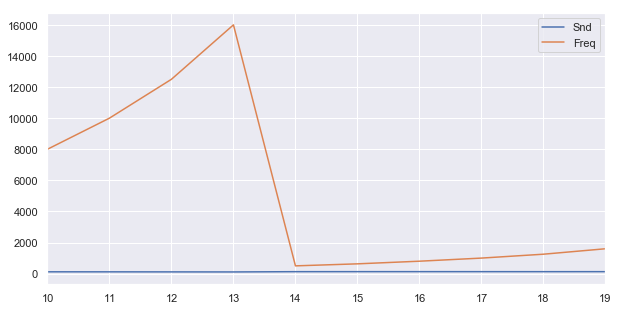

In [90]:
data[ ['Snd','Freq'] ][10:20].plot(
    figsize=(10,5) # размер графка
)

Для объекта "Series" используем метод __value_counts()__ для подсчета количества уникальных значений

In [91]:
data['Angle'].value_counts()

0.000     329
4.000      93
15.400     65
7.300      64
12.300     64
9.900      64
17.400     63
3.000      59
2.000      56
9.500      56
5.400      55
3.300      50
4.800      50
8.400      43
12.700     34
7.200      33
6.700      33
12.600     32
8.900      32
1.500      31
2.700      30
5.300      30
15.600     30
22.200     30
11.200     28
19.700     28
4.200      21
Name: Angle, dtype: int64

Для наглядного отображения построим пару графиков и разместим их горизонтально рядом друг с другом:
* Столбчатую диаграмму, командой __.plot(kind='bar')__ 
* Круговую диаграмму, командой __.plot(kind='pie')__ 

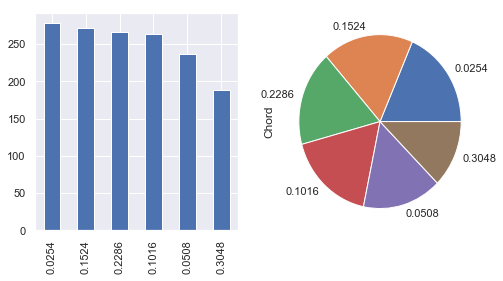

In [107]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
plt.figure(figsize=(8,4)) # создать полотно для графиков с заданным размером

plt.subplot(121) # 121 = 1,2,1 - кол. строк, кол. столбцов, индекс графика
data['Chord'].value_counts().plot(kind='bar')

plt.subplot(122) # 122 = 1,2,2 - кол. строк, кол. столбцов, индекс графика
data['Chord'].value_counts().plot(kind='pie', fontsize=11)

plt.show()

Для объединения столбцов в новый DataFrame используем __pd.concat()__

In [263]:
pd.concat(
    {
        "Rooms_Сырые": data['Rooms'].value_counts(normalize=False), 
        "Rooms_Нормализованные": data['Rooms'].value_counts(normalize=True)
    },
    axis=1 # axis - способ объединения 0 - как строки, 1 - как столбцы
)

,Rooms_Нормализованные,Rooms_Сырые
3,0.433,5881
2,0.269,3648
4,0.198,2688
1,0.050,681
5,0.044,596
6,0.005,67
7,0.001,10
8,0.001,8
10,0.000,1


In [264]:
data['Rooms'].value_counts(normalize=True).sum()

1.0

#### Фильтрация строк

К объектам-массивам "Series" можно применить условный оператор, результатом станет массив с значениями True/False для каждой строки.

In [265]:
type(data['Rooms'])

pandas.core.series.Series

In [266]:
# Проверить, выполняется ли условие  "== 3" для значений признака 'Rooms' 
(data['Rooms'] == 3) [10:20]

10    False
11     True
12    False
13    False
14    False
15    False
16     True
17     True
18     True
19    False
Name: Rooms, dtype: bool

Для получения конкретных  строк, для которых выполняется заданное условие следует подставить полученный массив.

In [267]:
data[ data['Rooms'] == 3 ]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,2.000,0.000,134.000,150.000,1900.000,Yarra,-37.809,144.994,Northern Metropolitan,4019.000
3,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,4/03/2017,2.500,3067.000,...,2.000,1.000,94.000,nan,nan,Yarra,-37.797,144.997,Northern Metropolitan,4019.000
6,Abbotsford,124 Yarra St,3,h,1876000.000,S,Nelson,7/05/2016,2.500,3067.000,...,2.000,0.000,245.000,210.000,1910.000,Yarra,-37.802,144.999,Northern Metropolitan,4019.000
11,Abbotsford,40 Nicholson St,3,h,1350000.000,VB,Nelson,12/11/2016,2.500,3067.000,...,2.000,2.000,214.000,190.000,2005.000,Yarra,-37.809,144.996,Northern Metropolitan,4019.000
16,Abbotsford,42 Henry St,3,h,1200000.000,S,Jellis,16/07/2016,2.500,3067.000,...,2.000,1.000,113.000,110.000,1880.000,Yarra,-37.806,144.993,Northern Metropolitan,4019.000
17,Abbotsford,78 Yarra St,3,h,1176500.000,S,LITTLE,16/07/2016,2.500,3067.000,...,1.000,1.000,138.000,105.000,1890.000,Yarra,-37.802,144.996,Northern Metropolitan,4019.000
18,Abbotsford,196 Nicholson St,3,h,955000.000,S,Collins,17/09/2016,2.500,3067.000,...,1.000,0.000,183.000,nan,nan,Yarra,-37.802,144.998,Northern Metropolitan,4019.000
21,Abbotsford,13/11 Nicholson St,3,t,900000.000,S,Beller,18/03/2017,2.500,3067.000,...,2.000,2.000,0.000,nan,2010.000,Yarra,-37.809,144.996,Northern Metropolitan,4019.000
22,Abbotsford,138/56 Nicholson St,3,u,1090000.000,S,Jellis,18/03/2017,2.500,3067.000,...,2.000,2.000,4290.000,27.000,nan,Yarra,-37.808,144.996,Northern Metropolitan,4019.000
27,Abbotsford,48 Abbotsford St,3,h,1447500.000,PI,Nelson,22/08/2016,2.500,3067.000,...,3.000,1.000,166.000,174.000,2012.000,Yarra,-37.802,145.000,Northern Metropolitan,4019.000


<a name="ch1.5"> </a>

## 1.5. Группировка

Объекты "DataFrame" позволяет группировать по одному или нескольким столбцам и применять к группированным данным агрегатные функции (sum, mean, median, count, max, min, ...)

In [268]:
data.groupby(['Suburb','Rooms'])['Price'].min() [0:20]                                                               

Suburb        Rooms
Abbotsford    1        300000.000
              2        480000.000
              3        850000.000
              4       1330000.000
Aberfeldie    1        280000.000
              2        373000.000
              3        726000.000
              4       1150000.000
              5       1472000.000
Airport West  2        440000.000
              3        510000.000
              4        765000.000
              5        755000.000
              6        725000.000
Albanvale     2        415000.000
              3        506000.000
              4        655000.000
Albert Park   1        442500.000
              2        647000.000
              3       1300000.000
Name: Price, dtype: float64

In [269]:
data.groupby(['Rooms','Suburb'])['Price'].min() [0:10]

Rooms  Suburb        
1      Abbotsford       300000.000
       Aberfeldie       280000.000
       Albert Park      442500.000
       Albion           145000.000
       Alphington       316000.000
       Armadale         280000.000
       Ascot Vale       390000.000
       Balaclava        280000.000
       Balwyn           390000.000
       Bentleigh East   370000.000
Name: Price, dtype: float64

<a name="ch1.6"> </a>

## 1.6. Замена значений

Для регрессионной модели необходимо, чтобы используемые значения были числовыми. Но в таблицах часто встречаются признаки строкового типа (Названия городов, видов, моделей и т.д.). Один из способов передать эти признаки в обработку - это заменить из числовыми значениями. Применительно к "DataFrame" и "Series" доступны методы __replace()__ и  __map()__

In [114]:
# Создим тестовый объект DataFrame
ddf = pd.DataFrame (
    {
        u"День недели":["Пн","Вт","Ср","Чт", "Пт", "Сб", "Вс"],
        u"Температура":[20,20,30,10,10,20,30],
    }
)
print (ddf)

  День недели  Температура
0          Пн           20
1          Вт           20
2          Ср           30
3          Чт           10
4          Пт           10
5          Сб           20
6          Вс           30


In [115]:
# Составим словарь для замен - Ключ:Значение
day_dict = {"Пн":1,"Вт":2,"Ср":3,"Чт":4, "Пт":5, "Сб":6, "Вс":7}

# Используем метод replace() для отдельного столбца
ddf[u"День недели"].replace(day_dict)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
Name: День недели, dtype: int64

In [116]:
# Получим уникальные значения из отдельного столбца 
ddf[u"Температура"].unique()

array([20, 30, 10], dtype=int64)

In [117]:
# Составим словарь для замен - Ключ:Значение
weather_dict = {20: "Тепло", 30: "Жарко", 10: "Холодно", }

ddf[u"Температура"].map(weather_dict)

0      Тепло
1      Тепло
2      Жарко
3    Холодно
4    Холодно
5      Тепло
6      Жарко
Name: Температура, dtype: object

In [118]:
# Используем метод map()
ddf[u"Температура"].map("+{} t Co".format)

0    +20 t Co
1    +20 t Co
2    +30 t Co
3    +10 t Co
4    +10 t Co
5    +20 t Co
6    +30 t Co
Name: Температура, dtype: object

<a name="ch2"> </a>

# 2. Формирование выборки для обучения и проверки

<a name="ch2.1"> </a>

##  2.1. Первичный анализ

Получим информацию о таблице с данными.

In [119]:
nrow = data.shape[0]
ncol = data.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

Итого: 1503 записи, 6 столбец (признак).


In [120]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Freq     1503 non-null int64
Angle    1503 non-null float64
Chord    1503 non-null float64
Fsv      1503 non-null float64
Soplo    1503 non-null float64
Snd      1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB
None


На этом этапу становиться заметны пропуски, т.к. кол-во значений присутствующих в столбцах не совпадает. Обработку пропущенных  (NA - not available) выполним позднее.

In [121]:
# Получить количество пропущенных значений для каждого столбца, как сумма всех True
data.isnull().sum() 

Freq     0
Angle    0
Chord    0
Fsv      0
Soplo    0
Snd      0
dtype: int64

Метод __describe()__ показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): 
* count - число непропущенных значений, 
* mean - среднее арифметическое 
* std - стандартное отклонение (среднеквадратическое), 
* min, max - минимальное и максимальное значение 
* 0.25, 0.50, 0.75 квартили.
* unique - кол-во уникальных значения
* top - самое часто встречающееся значение
* freq - кол-во значений 'top'


In [122]:
data.describe() # описание для числовых значений

,Freq,Angle,Chord,Fsv,Soplo,Snd
count,1503.000,1503.000,1503.000,1503.000,1503.000,1503.000
mean,2886.381,6.782,0.137,50.861,0.011,124.836
std,3152.573,5.918,0.094,15.573,0.013,6.899
min,200.000,0.000,0.025,31.700,0.000,103.380
25%,800.000,2.000,0.051,39.600,0.003,120.191
50%,1600.000,5.400,0.102,39.600,0.005,125.721
75%,4000.000,9.900,0.229,71.300,0.016,129.995
max,20000.000,22.200,0.305,71.300,0.058,140.987


In [123]:
data.describe(include=['object', 'bool'])  # описание для не числовых значений

ValueError: No objects to concatenate

In [ ]:
print data['Type'].unique() # уникальные значения
print data['Type'].nunique() # кол-во уникальных значения

## 2.2. Корреляция

* __Коэффициент корреляции r-Пирсона__
  
  Мера линейной взаимосвязи переменных, при нелинейной взаимосвязи непоказателен. Не устойчив к выбросам в выборке. Учитывает числовые значения. Переменные должны иметь нормальное распределение. Изменяется в пределах от -1 до +1.

![Drag Racing](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Correlation_examples.png/400px-Correlation_examples.png)

Перед дальнейшими действиями следует обработать пропущенные значения. 

In [ ]:
data.isna().sum() 

Возможные варианты:
* отбросить (исключить) строки в которых отсутствуют значения. __.dropna(how='any')__
* заполнить отсутствующее значение. Для числовых значений можно использовать среденее __.mean()__.

In [ ]:
data_origin = data

In [124]:
data = data.dropna(how='any')
data.to_csv('./melbourne-housing-snapshot/melb_data_clear.csv')
# inplace=True - означает, что операция примениться к исходному набору данных

#data['Car'].fillna(data['Car'].mean(), inplace=True)
#data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace=True)
#data['YearBuilt'].fillna(data['YearBuilt'].mean(), inplace=True)
#data['CouncilArea'].fillna(data['CouncilArea'].mean(), inplace=True)

IOError: [Errno 2] No such file or directory: './melbourne-housing-snapshot/melb_data_clear.csv'

In [125]:
len(data)

1503

Постоим матрицу корреляции, вызвав метод __.corr(method='pearson')__

In [126]:
corrdf = data.corr(method='pearson') # method= {‘pearson’, ‘kendall’, ‘spearman’} или функция
print corrdf

        Freq  Angle  Chord    Fsv  Soplo    Snd
Freq   1.000 -0.273 -0.004  0.134 -0.230 -0.391
Angle -0.273  1.000 -0.505  0.059  0.753 -0.156
Chord -0.004 -0.505  1.000  0.004 -0.221 -0.236
Fsv    0.134  0.059  0.004  1.000 -0.004  0.125
Soplo -0.230  0.753 -0.221 -0.004  1.000 -0.313
Snd   -0.391 -0.156 -0.236  0.125 -0.313  1.000


Для того, чтобы визуально оценить величину коэффициентов корреляции постоим тепловую карту по значениям взаимозависимости признаков выборки.

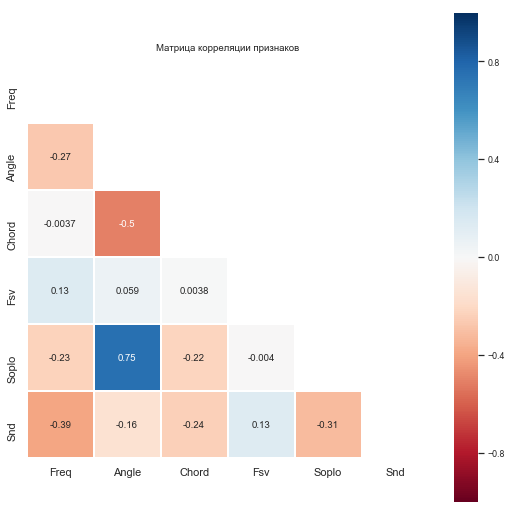

In [127]:
import matplotlib.pyplot as plt
##cmap = sns.diverging_palette(220, 10, as_cmap=True) ## сгенерировать цветовую карту
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corrdf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9,9))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(data=corrdf, vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            #cbar_kws={"shrink": .5}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');
# cmap = https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Построим диаграммы между каждой парой признаков 

In [ ]:
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков       
sns.pairplot(data)

<a name="ch2.3"> </a>

## 2.3. Выбор целевого значения и признаков для анализа данных

На основе информации о взаимозависимости и степени влияния признаков выберем целевое значение:
- 'Price' - Стоимость.

Признаки для анализа следует выбирать с высоким коэфф. корреляции с целевым значением, но при этом как можно более не связанные  между собой: 
  * 'YearBuilt' - Год посройки
  * 'Landsize'-  Размер участка
  * 'Rooms' - Кол-во комнат

Выведем коэфф. корреляции для выбранных признаков

In [128]:
features = [u'Freq']
target = [u'Snd']

for features_name in features:
    print "{:<9}, {} = {:>6.3f}".format(features_name, target, corrdf[features_name][target[0]])

Freq     , [u'Snd'] = -0.391


In [289]:
test_corrdf2 = data[features + target].corr(method='pearson') # method= {‘pearson’, ‘kendall’, ‘spearman’} или функция
print test_corrdf2


           Rooms  YearBuilt  Landsize  Price
Rooms      1.000     -0.068     0.099  0.534
YearBuilt -0.068      1.000     0.027 -0.305
Landsize   0.099      0.027     1.000  0.081
Price      0.534     -0.305     0.081  1.000


Посмотрим, насколько повлияли отброшенные значения на коэфф. корреляции для выбранных признаков

In [113]:
import matplotlib.pyplot as plt
sns.set(style="white") # цвет фона

delta_corrdf = data[ features + target ].corr(method='pearson') - data_origin[features + target].corr(method='pearson')

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(delta_corrdf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9,9))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(data=delta_corrdf,
            vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            #cbar_kws={"shrink": .5}  # уменьшить размер легенды
           )
plt.title(u'Изменение коэфф. корреляции после отброшенных значений');

KeyError: u"None of [Index([u'Rooms', u'YearBuilt', u'Landsize', u'Price'], dtype='object')] are in the [columns]"

In [291]:
delta_corrdf[target]

,Price
Rooms,0.037
YearBuilt,0.019
Landsize,0.044
Price,0.000


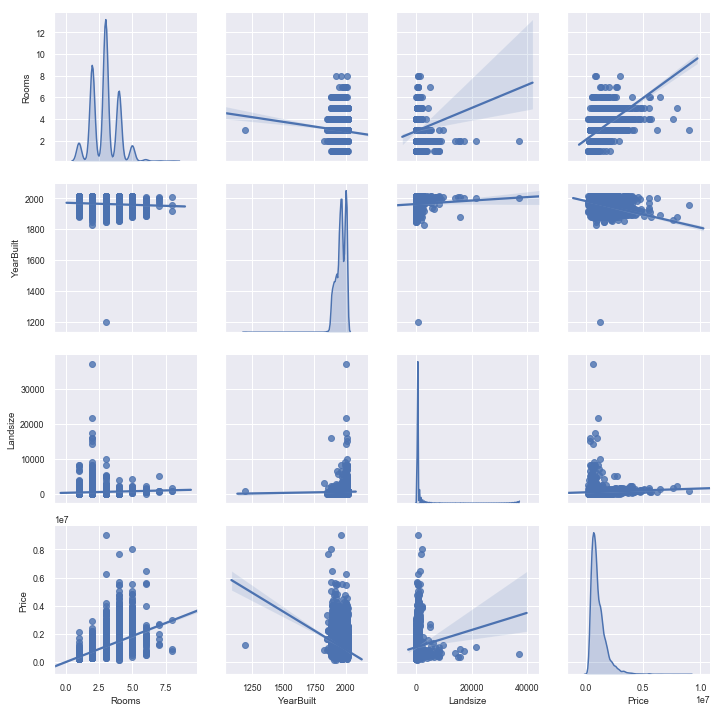

In [292]:
# График признаков попарно с разделением по типу
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков
sns.pairplot(data[features + target], 
            #hue = 'Type', # Признак разделения
            kind="reg", # Fit linear regression models to the scatter plots:
            diag_kind = 'kde', # Признак разделения тип графика
            ); 

<a name="ch2.4"> </a>

## 2.4. Просмотр характеристик выбранных признаков

Rooms 1 8
YearBuilt 1196.0 2018.0
Landsize 0.0 37000.0


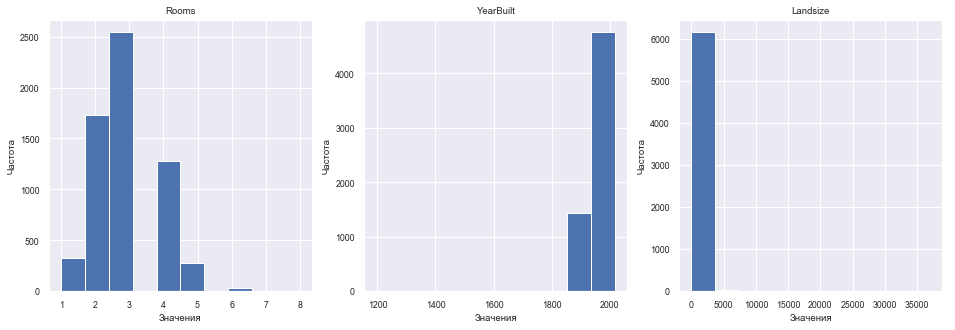

In [293]:
# Строим гистограммы по каждому признаку: 
#data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize(16, 5))
plot_number = 0
for feature_name in features:
    plot_number += 1
    plt.subplot(1,3,plot_number)
    plt.hist(data[feature_name])
    
    #plt.xlim( data[feature_name].min(), data[feature_name].max() )
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print feature_name, data[feature_name].min(), data[feature_name].max()

### Признак 'YearBuilt'

По графику распределения заметно существенное смещение признака 'YearBuilt'. Предположительно в "пустой" части графика располагается малая часть значений.
Проверим минимальное значение и квартили.

In [294]:
data[['YearBuilt']].describe()

,YearBuilt
count,6196.000
mean,1964.082
std,38.106
min,1196.000
25%,1940.000
50%,1970.000
75%,2000.000
max,2018.000


In [295]:
print ("minimum YearBuilt", data['YearBuilt'].min())
data[data['YearBuilt'] < 1820]

('minimum YearBuilt', 1196.0)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.000,VB,McGrath,24/06/2017,14.200,3149.000,...,1.000,4.000,807.000,117.000,1196.000,Monash,-37.868,145.121,Eastern Metropolitan,13366.000


<Figure size 1152x360 with 0 Axes>

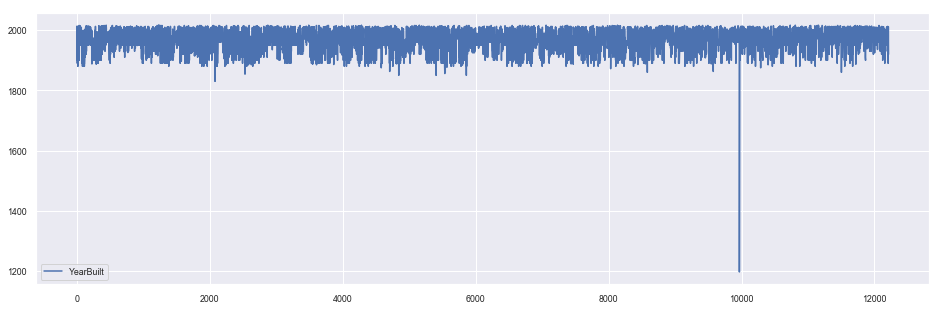

In [296]:
plt.figure(figsize(16, 5))
data[['YearBuilt']].plot(kind='line')

Построим диаграмму размаха для признака<img src="https://www.thoughtco.com/thmb/Q6bHgTs2QBF2pPuEGy0W9LgyrSU=/768x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/boxplotwithoutliers-5b8ec88846e0fb0025192f90.jpg"
width="40%" height="40%"
     alt="Box plot"  style="float: right; margin-right: 10px;"
      />

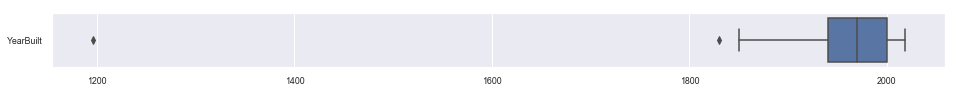

In [297]:
plt.figure(figsize(16, 1))
sns.boxplot( data=data[['YearBuilt']], orient="h")

In [298]:
dcount = data['YearBuilt'].count() # кол-во эл. общее
dmean = data['YearBuilt'].mean() # среднее зн. общее
over_count = len(data[data['YearBuilt'] < 1820]) # кол-во эл. ниже порогового
over_mean = data[ data['YearBuilt']  < 1820 ]['YearBuilt'].mean()  # среднее зн. выше порогового

print "В выборке обнаружен \"выброс\" - {} из {} значение(ий) с величиной отличающейся в {:.3f} раз чем у {:.6f} части оставшейся выборки.".format( 
    over_count,
    dcount,
    over_mean / dmean, 
    (dcount - over_count * 1.0) / dcount )

В выборке обнаружен "выброс" - 1 из 6196 значение(ий) с величиной отличающейся в 0.609 раз чем у 0.999839 части оставшейся выборки.


Данные элементы будут отброшены и не будут учитываться в дальнейшем анализе.

In [42]:
# оставить строки, с значение выше порогового
data = data[  ~  (data['YearBuilt'] < 1820) ]

In [43]:
len(data['YearBuilt'])

12510

In [40]:
data[['YearBuilt']].describe()

,YearBuilt
count,7135.000
mean,1974.665
std,27.304
min,1920.000
25%,1956.500
50%,1970.000
75%,2000.000
max,2018.000


<Figure size 1152x360 with 0 Axes>

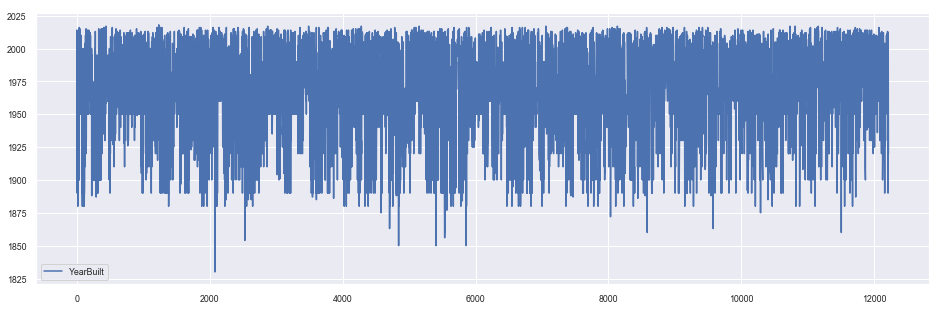

In [302]:
plt.figure(figsize(16, 5))
data[['YearBuilt']].plot(kind='line')

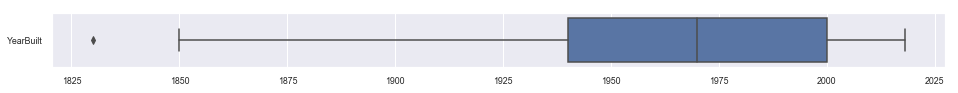

In [303]:
plt.figure(figsize(16, 1))
sns.boxplot( data=data[['YearBuilt']], orient="h")

### Признак 'Landsize'

In [304]:
data[['Landsize']].describe()

,Landsize
count,6195.000
mean,470.953
std,897.512
min,0.000
25%,152.000
50%,373.000
75%,628.000
max,37000.000


In [305]:
print ("minimum Landsize", data['Landsize'].min())
data[data['Landsize'] > 10000]

('minimum Landsize', 0.0)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3750,Maidstone,17/46 Eucalyptus Dr,2,u,352500.000,S,hockingstuart,18/03/2017,9.200,3012.000,...,1.000,1.000,15100.000,66.000,2012.000,Maribyrnong,-37.779,144.873,Western Metropolitan,3873.000
7778,Collingwood,1/78 Oxford St,2,t,945000.000,S,Jellis,8/04/2017,1.600,3066.000,...,1.000,1.000,15900.000,98.000,1880.000,Yarra,-37.803,144.985,Northern Metropolitan,4553.000
8241,Port Melbourne,55/4 Seisman Pl,2,u,1030000.000,S,Buxton,29/04/2017,3.800,3207.000,...,2.000,2.000,21715.000,99.000,2005.000,Port Phillip,-37.842,144.945,Southern Metropolitan,8648.000
9223,Maribyrnong,2/6 Horizon Dr,2,u,585000.000,S,Brad,3/06/2017,4.300,3032.000,...,2.000,2.000,37000.000,90.000,2004.000,Maribyrnong,-37.775,144.893,Western Metropolitan,4918.000
10488,Richmond,52/73 River St,2,u,615000.000,PI,hockingstuart,27/05/2017,2.400,3121.000,...,2.000,1.000,14196.000,86.000,2005.000,Yarra,-37.819,145.013,Northern Metropolitan,14949.000
10819,South Yarra,308/800 Chapel St,2,u,762500.000,S,hockingstuart,8/07/2017,2.700,3141.000,...,1.000,1.000,17200.000,79.000,2003.000,Stonnington,-37.836,144.997,Southern Metropolitan,14887.000
11526,Travancore,2115/18 Mt Alexander Rd,2,u,341500.000,S,McGrath,15/07/2017,4.300,3032.000,...,1.000,1.000,16000.000,68.500,2012.000,Moonee Valley,-37.785,144.938,Western Metropolitan,1052.000


<Figure size 1152x360 with 0 Axes>

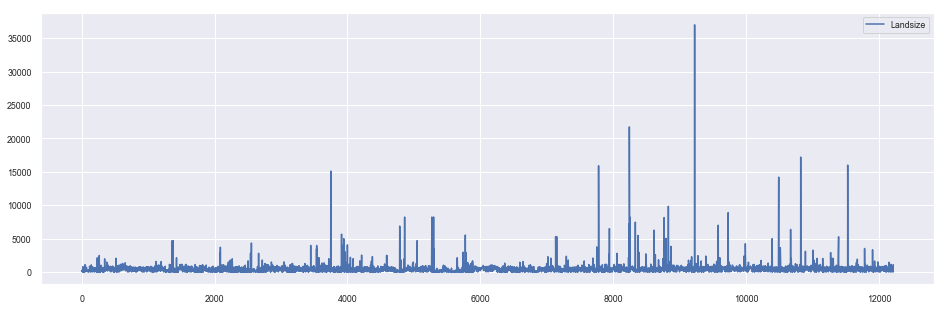

In [306]:
plt.figure(figsize(16, 5))
data[['Landsize']].plot(kind='line')

In [307]:
dcount = data['Landsize'].count() # кол-во эл. общее
dmean = data['Landsize'].mean() # среднее зн. общее
over_count = len( data[data['Landsize'] > 3500] ) # кол-во эл. выше порогового
over_mean = data[ data['Landsize'] > 3500 ]['Landsize'].mean()  # среднее зн. выше порогового

print "В выборке обнаружен \"выброс\" - {} из {} значение(ий) с величиной отличающейся в {:.3f} больше чем у {:.6f} части оставшейся выборки.".format(  
    over_count,
    dcount , 
    over_mean/dmean, 
    (dcount - over_count * 1.0) / dcount )

В выборке обнаружен "выброс" - 48 из 6195 значение(ий) с величиной отличающейся в 16.337 больше чем у 0.992252 части оставшейся выборки.


Данные элементы будут отброшены и не будут учитываться в дальнейшем анализе.

In [308]:
# оставить строки, с значение ниже порогового
data = data[ ~ (data['Landsize'] > 3500)]

In [309]:
data[['Landsize']].describe()

,Landsize
count,6147.000
mean,414.551
std,360.274
min,0.000
25%,151.000
50%,368.000
75%,624.000
max,3448.000


<Figure size 1152x360 with 0 Axes>

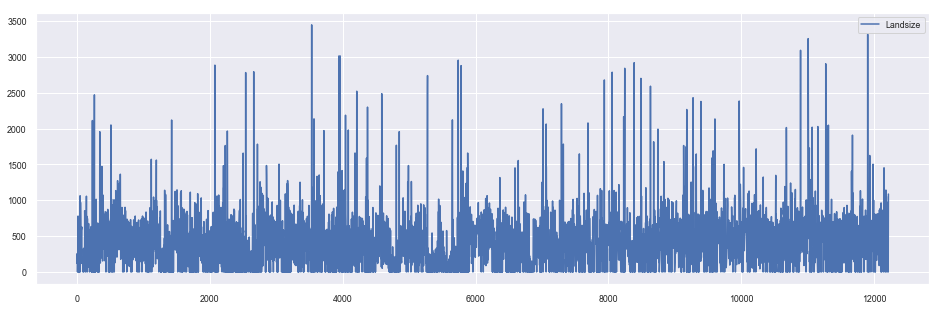

In [310]:
plt.figure(figsize(16, 5))
data[['Landsize']].plot(kind='line')

#### Гистограммы по каждому признаку повторно

Rooms 1 8
YearBuilt 1830.0 2018.0
Landsize 0.0 3448.0


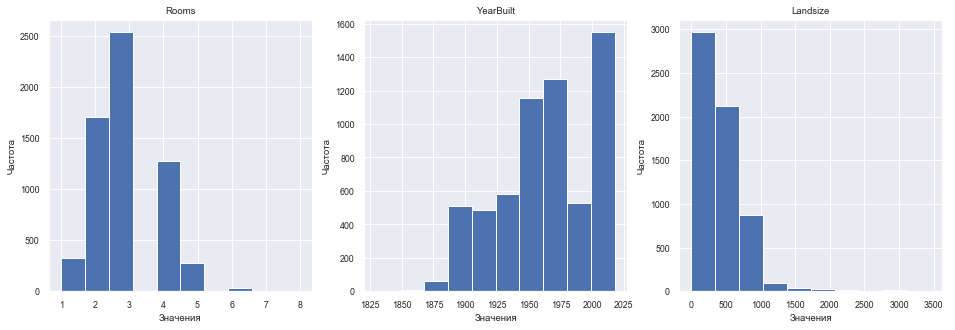

In [311]:
# Строим гистограммы по каждому признаку: 
#data[features].hist() #Упрощенный вывод графиков

plt.figure(num=1, figsize=figsize(16, 5))
plot_number = 0
for feature_name in features:
    plot_number += 1
    plt.subplot(1,3,plot_number)
    plt.hist(data[feature_name])
    #plt.xlim( data[feature_name].min(), data[feature_name].max() )
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print feature_name, data[feature_name].min(), data[feature_name].max()

#### Гистограмма целевой переменной

In [312]:
data[target].describe()

,Price
count,6147.000
mean,1071375.718
std,675907.683
min,131000.000
25%,622250.000
50%,882000.000
75%,1330000.000
max,9000000.000


<Figure size 1152x360 with 0 Axes>

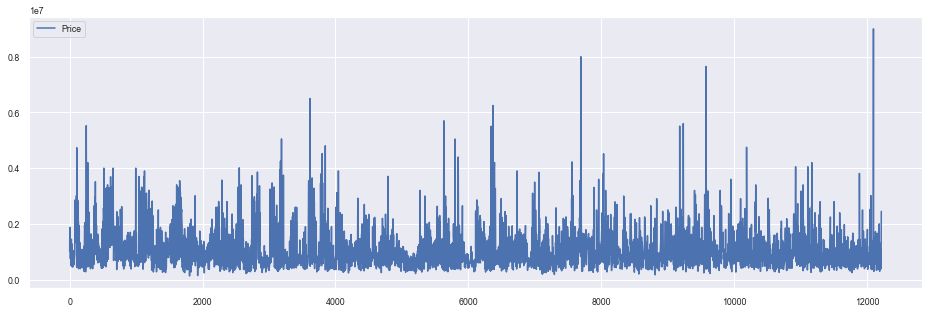

In [313]:
plt.figure(figsize(16, 5))
data[target].plot(kind='line')

Коэфф. асимметрии, эксцесса в числовом виде


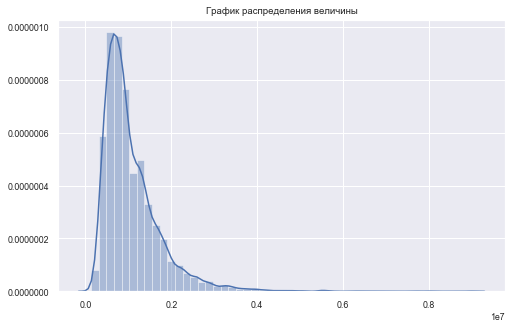

In [314]:
plt.figure(figsize=(8,5))
sns.distplot(data[target],  hist=True) # Ядерная оценка плотности (KDE - Kernel density estimation)
plt.title(u'График распределения величины')
print "Коэфф. асимметрии, эксцесса в числовом виде"

((array([-3.68857787, -3.45642624, -3.32863351, ...,  3.32863351,
          3.45642624,  3.68857787]),
  array([ 131000.,  145000.,  170000., ..., 7650000., 8000000., 9000000.])),
 (608888.5303425731, 1071375.718236538, 0.9004195353276806))

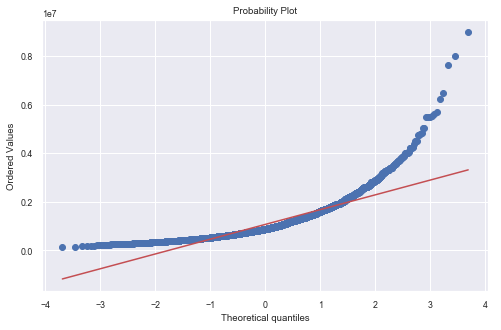

In [315]:
# диаграмма вероятности
plt.figure(figsize=(8,5))
stats.probplot(data['Price'], plot=plt)

<a name="ch3"> </a>

# 3. Построение регрессионных моделей

Разделим получившиеся данные на тренировочную (data_x_train, data_y_train) и проверочную части (x_test, y_test)

In [131]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    data[features], data[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 

In [132]:
print "Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
)

TypeError: len() takes exactly one argument (0 given)

In [133]:
x_train[:3]

,Freq
0,800
1108,2500
764,800


In [134]:
y_train[:3]

,Snd
0,126.201
1108,130.086
764,122.790


<a name="ch3.1"> </a>

## 3.1. Линейная регрессия

- Выдвижение рабочей гипотезы
- Построение модели
- Анализ качества и интерпретация модели
- Определение путей изменения модели
- Выдвижение новых гипотез и построение новых моделей.
- Практическое использование модели

In [136]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

<a name="ch3.1.1"> </a>

### 3.1.1. Одномерная модель от признака 'Rooms'

In [138]:
lr = linear_model.LinearRegression()

x1 = x_train['Freq'].values.reshape(-1, 1)
y1 = y_train['Snd'].values.reshape(-1, 1)
x2 = x_test['Freq'].values.reshape(-1, 1)
y2 = y_test['Snd'].values.reshape(-1, 1)

In [139]:
# Вычислить коэфф. на тренировочном наборе
lin_model = lr.fit(x1, y1)
# Получить предсказание на проверочном наборе
y_pred  = lin_model.predict(x2)

<Figure size 1080x360 with 0 Axes>

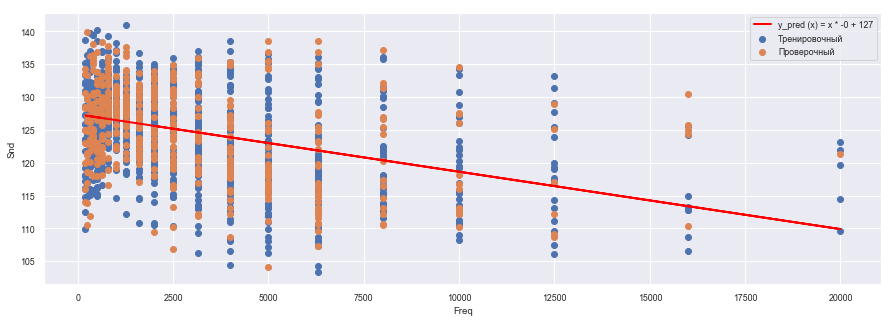

In [142]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') # тренировочный
ax.scatter(x2, y2, label=u'Проверочный') # проверочный
ax.plot( x2, y_pred, lw=2, color='red',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('Freq')
ax.set_ylabel(target[0])

plt.show()

Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

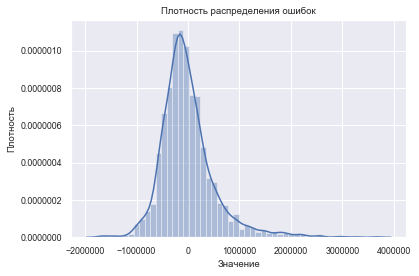

In [324]:
plt.figure(figsize=(6,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

In [325]:
print "y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0])

print "MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred))
print "MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred))
print "RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) ))
print "R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred))

y_pred (x) = x * 369929 + -13670

MAE Mean absolute error: 374250
MSE Mean squared error: 285469691724
RMSE: 534294
R2 of Linear Regression (1 is perfect): 0.318


In [326]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

,__Проверочное,_Предсказанные,Ошибка
0,1913000.000,1096116.396,816883.604
1,1403000.000,1096116.396,306883.604
2,1631000.000,1096116.396,534883.604
3,680000.000,1096116.396,-416116.396
4,1250000.000,1096116.396,153883.604


Text(0,0.5,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u043d\u043e\u0435 Y')

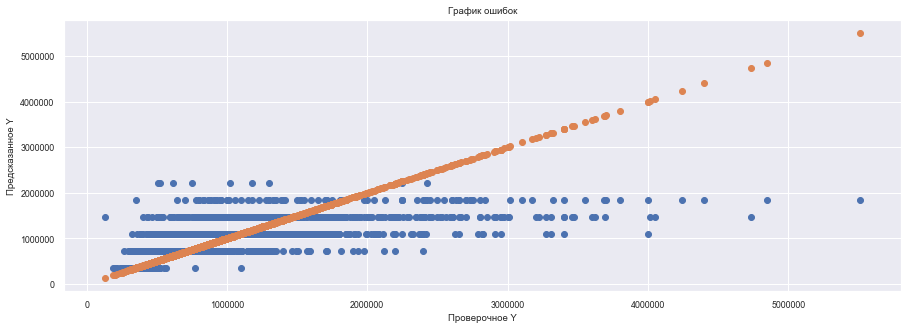

In [327]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0,0.5,u'\u0410\u0431\u0441\u043e\u043b\u044e\u0442\u043d\u0430\u044f \u043e\u0448\u0438\u0431\u043a\u0430')

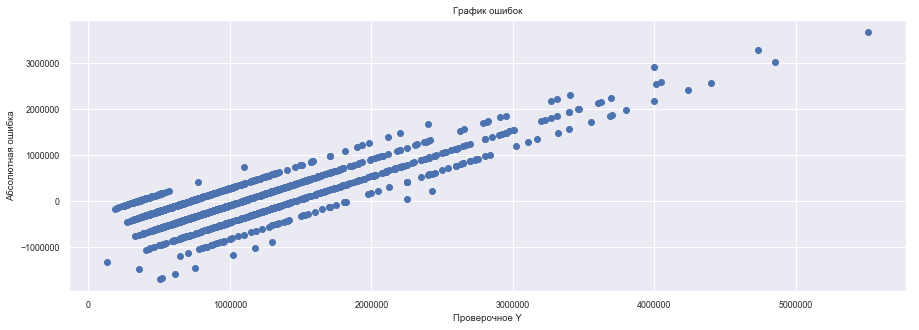

In [328]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

<a name="ch3.1.2"> </a>

### 3.1.2. Одномерная модель от признака 'Landsize'

In [329]:
lr = linear_model.LinearRegression()

x1 = x_train['Landsize'].values.reshape(-1, 1)
y1 = y_train['Price'].values.reshape(-1, 1)
x2 = x_test['Landsize'].values.reshape(-1, 1)
y2 = y_test['Price'].values.reshape(-1, 1)

In [330]:
lin_model = lr.fit(x1, y1)
y_pred  = lin_model.predict(x2)

<Figure size 1080x360 with 0 Axes>

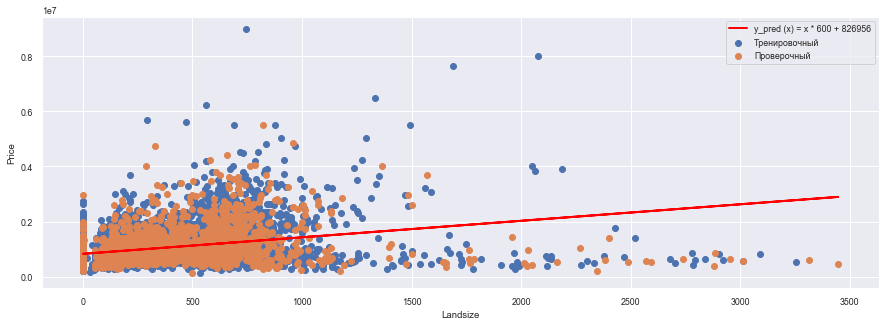

In [331]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') # тренировочный
ax.scatter(x2, y2, label=u'Проверочный') # проверочный
ax.plot( x2, y_pred, lw=2, color='red',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('Landsize')
ax.set_ylabel(target[0])

plt.show()

Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

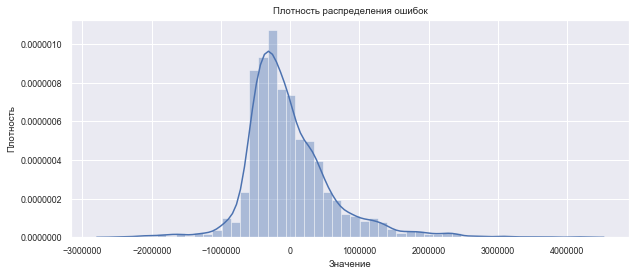

In [332]:
plt.figure(figsize=(10,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

In [333]:
print "y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0])

print "MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred))
print "MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred))
print "RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) ))
print "R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred))

y_pred (x) = x * 600 + 826956

MAE Mean absolute error: 451103
MSE Mean squared error: 400406715581
RMSE: 632777
R2 of Linear Regression (1 is perfect): 0.043


In [334]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

,__Проверочное,_Предсказанные,Ошибка
0,1913000.000,1193463.628,719536.372
1,1403000.000,2267194.319,-864194.319
2,1631000.000,1296037.901,334962.099
3,680000.000,1080092.063,-400092.063
4,1250000.000,968520.047,281479.953


Text(0,0.5,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u043d\u043e\u0435 Y')

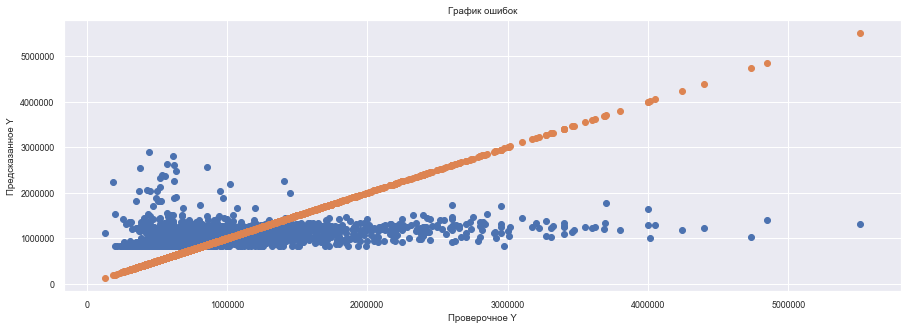

In [335]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0,0.5,u'\u0410\u0431\u0441\u043e\u043b\u044e\u0442\u043d\u0430\u044f \u043e\u0448\u0438\u0431\u043a\u0430')

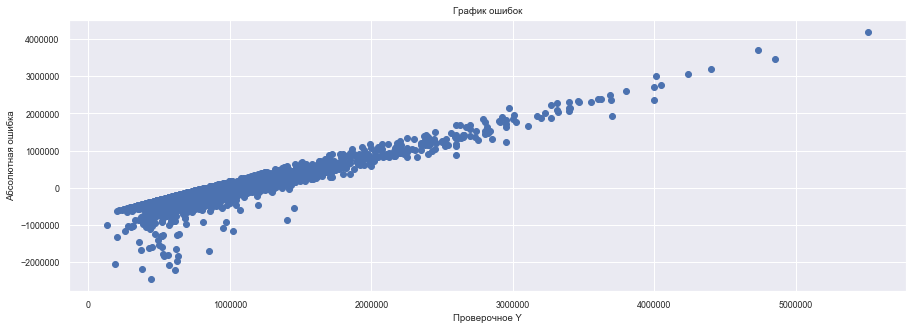

In [336]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

<a name="ch3.1.3"> </a>

### 3.1.3. Одномерная модель от признака 'YearBuilt'

In [337]:
lr = linear_model.LinearRegression()

x1 = x_train['YearBuilt'].values.reshape(-1, 1)
y1 = y_train['Price'].values.reshape(-1, 1)
x2 = x_test['YearBuilt'].values.reshape(-1, 1)
y2 = y_test['Price'].values.reshape(-1, 1)

In [338]:
lin_model = lr.fit(x1, y1)
y_pred  = lin_model.predict(x2)

<Figure size 1080x360 with 0 Axes>

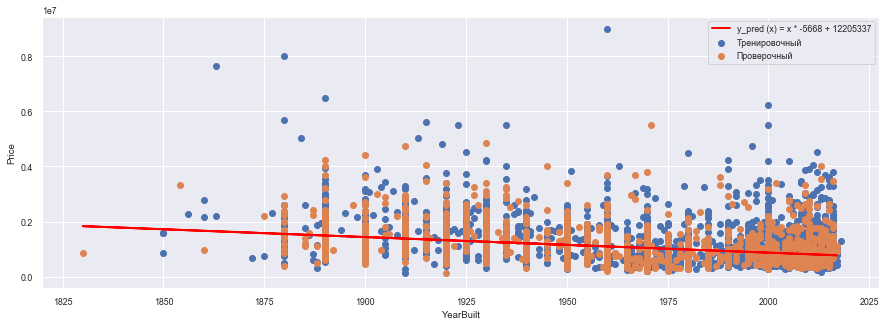

In [339]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') # тренировочный
ax.scatter(x2, y2, label=u'Проверочный') # проверочный
ax.plot( x2, y_pred, lw=2, color='red',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('YearBuilt')
ax.set_ylabel(target[0])

plt.show()

Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

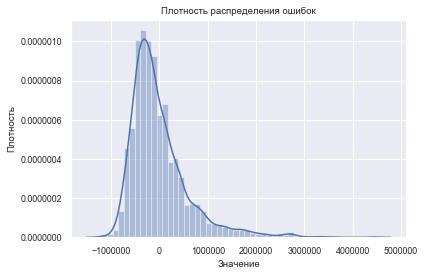

In [340]:
plt.figure(figsize=(6,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

In [341]:
print "y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0])

print "MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred))
print "MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred))
print "RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) ))
print "R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred))

y_pred (x) = x * -5668 + 12205337

MAE Mean absolute error: 435533
MSE Mean squared error: 370676653413
RMSE: 608832
R2 of Linear Regression (1 is perfect): 0.114


In [342]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

,__Проверочное,_Предсказанные,Ошибка
0,1913000.000,1266225.700,646774.300
1,1403000.000,982829.039,420170.961
2,1631000.000,1152867.036,478132.964
3,680000.000,1096187.703,-416187.703
4,1250000.000,846798.642,403201.358


Text(0,0.5,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u043d\u043e\u0435 Y')

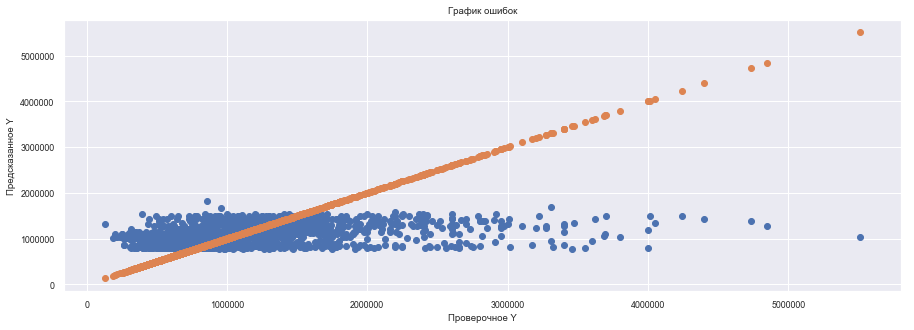

In [343]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0,0.5,u'\u0410\u0431\u0441\u043e\u043b\u044e\u0442\u043d\u0430\u044f \u043e\u0448\u0438\u0431\u043a\u0430')

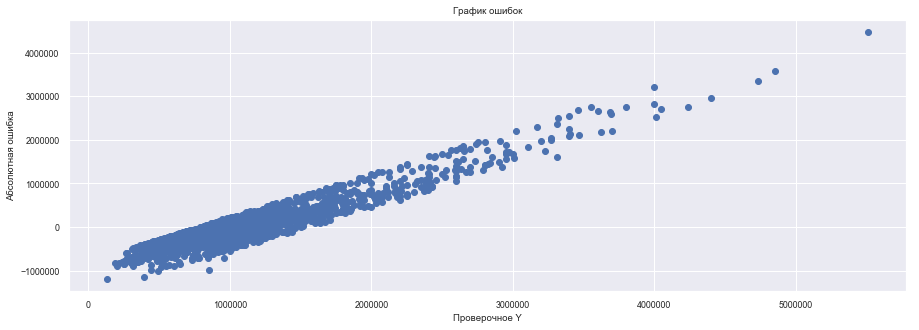

In [344]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

<a name="ch3.1.4"> </a>

### 3.1.4. Многомерная модель

In [345]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

bh_data = load_boston()
print(bh_data.keys())
boston = pd.DataFrame(bh_data.data, columns=bh_data.feature_names)

#print(data.describe)

['filename', 'data', 'target', 'DESCR', 'feature_names']


In [346]:
lin_reg_mult = LinearRegression()
lin_reg_mult.fit(x_train, y_train)
y_pred = lin_reg_mult.predict(x_test)

In [347]:
print "y_pred (x) =\n   x1 *{} + {:.0f}\n".format(lin_reg_mult.coef_, lin_reg_mult.intercept_[0])
print "MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y_test, y_pred))
print "MSE Mean squared error: {:.0f}".format( mean_squared_error(y_test, y_pred))
print "RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y_test, y_pred) ))
print "R2 of Linear Regresson (1 is perfect): {:.3f}".format( r2_score(y_test, y_pred))

y_pred (x) =
   x1 *[[ 3.30103284e+05 -5.12367003e+03  2.02050874e+02]] + 10082741

MAE Mean absolute error: 351151
MSE Mean squared error: 253160763804
RMSE: 503151
R2 of Linear Regresson (1 is perfect): 0.395


In [348]:
(y_test - y_pred).head()

,Price
6324,605179.520
4592,-10308.042
423,391102.221
12022,-435922.764
7424,397100.180


<Figure size 1080x360 with 0 Axes>

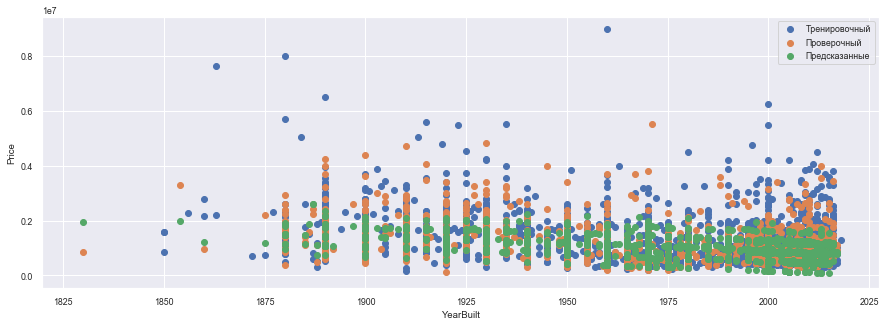

In [349]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x_train['YearBuilt'], y_train, label=u'Тренировочный') # тренировочный
ax.scatter(x_test['YearBuilt'], y_test, label=u'Проверочный') # проверочный
ax.scatter(x_test['YearBuilt'], y_pred, label=u'Предсказанные') # проверочный

ax.legend(loc="best")
ax.set_xlabel('YearBuilt')
ax.set_ylabel(target[0])

plt.show()

Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

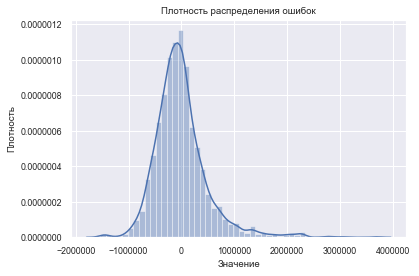

In [350]:
plt.figure(figsize=(6,4))
sns.distplot((y_test - y_pred))
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

Text(0,0.5,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u043d\u043e\u0435 Y')

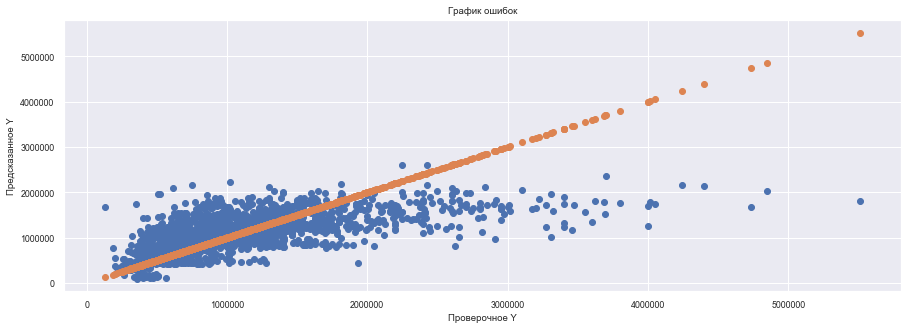

In [351]:
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0,0.5,u'\u0410\u0431\u0441\u043e\u043b\u044e\u0442\u043d\u0430\u044f \u043e\u0448\u0438\u0431\u043a\u0430')

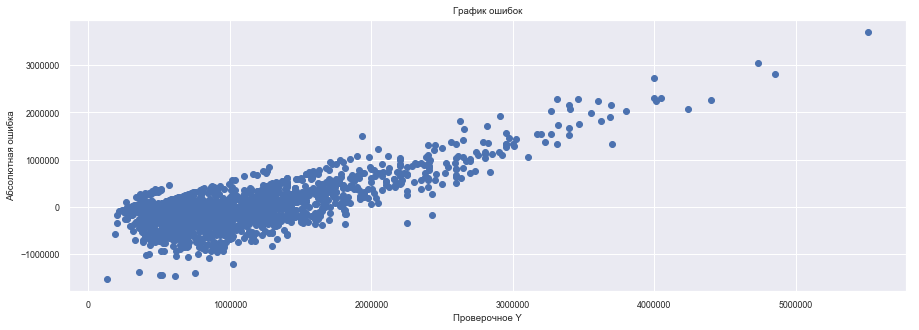

In [352]:
plt.scatter(y_test, (y_test - y_pred) )

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

In [353]:
import statsmodels.api as sm
sm_x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, sm_x_train)  # OLS - Ordinary Least Squares
results = model.fit() 

print('Parameters: {:.0f}', results.params)
print('R2: ', results.rsquared)
print(results.summary())

('Parameters: {:.0f}', const       10082740.705
Rooms         330103.284
YearBuilt      -5123.670
Landsize         202.051
dtype: float64)
('R2: ', 0.3547634985170308)
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     787.7
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        07:36:33   Log-Likelihood:                -62987.
No. Observations:                4302   AIC:                         1.260e+05
Df Residuals:                    4298   BIC:                         1.260e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

## Нелинейная регрессия. Многомерная модель

Линейная регрессия 
* linear_model.LinearRegression() - МНК метод наименьших средних квадратов
* linear_model.Ridge() - наименьших средних квадратов с регуляризацией
   * пример https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db
* linear_model.Lasso() Линейная модель обучена с L1 до регуляризатора (он же Лассо)

* Обобщённый метод наименьших квадратов (ОМНК, GLS — англ. Generalized Least Squares) 


Метод опорных векторов (Support Vector Regression (SVR))
- Support Vector Regression (SVR) https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

In [354]:
#print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = x_train[['YearBuilt']]
y = y_train

# #############################################################################
# Add noise to targets
#y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2


#svrs = [svr_rbf, svr_lin] # , svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

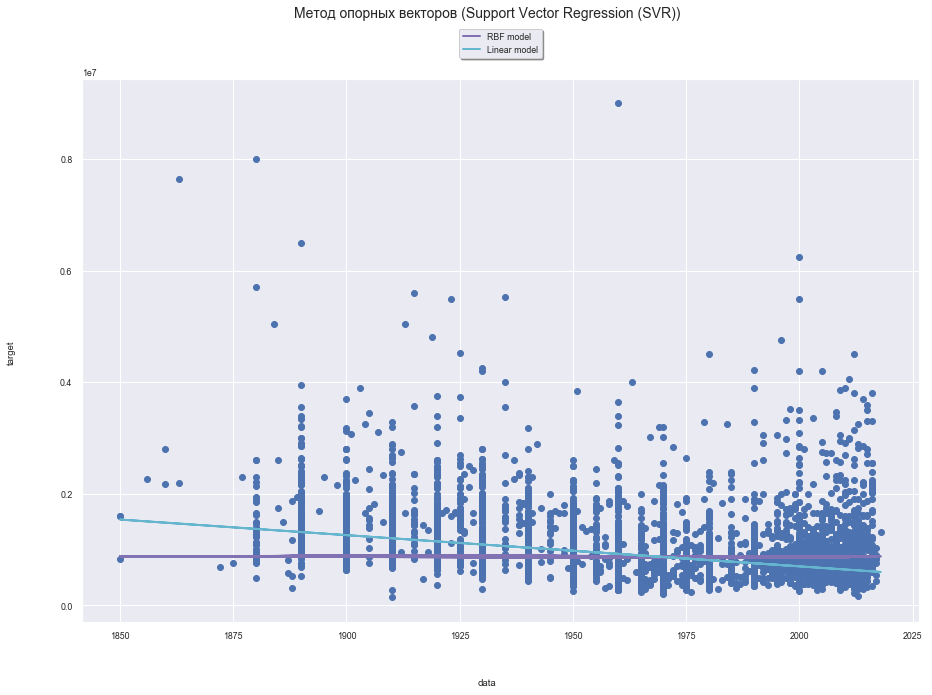

In [355]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharey=True)
axes.scatter(X, y)
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

axes.plot(X, svr_rbf.fit(X, y).predict(X), color='m', lw=lw,
                  label='{} model'.format('RBF'))

axes.plot(X, svr_lin.fit(X, y).predict(X), color='c', lw=lw,
                  label='{} model'.format('Linear'))

axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle(u"Метод опорных векторов (Support Vector Regression (SVR))", fontsize=14)
plt.show()

- - - - - - - 